In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
data=pd.concat([train,test],ignore_index=True)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

In [5]:
data['Cabin'].isnull().sum()/len(data)

0.774637127578304

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

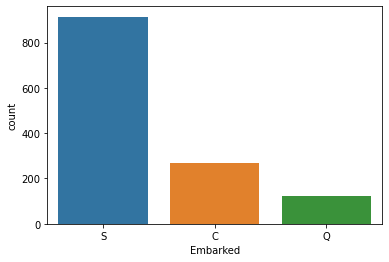

In [8]:
sns.countplot('Embarked',data=data)

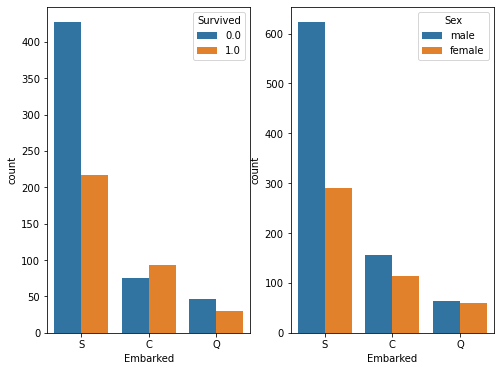

In [9]:
f,ax=plt.subplots(1,2,figsize=(8,6))
sns.countplot('Embarked',hue='Survived',data=data, ax=ax[0])
sns.countplot('Embarked',hue='Sex',data=data, ax=ax[1])

In [10]:
data['Embarked'].fillna('S',inplace=True)

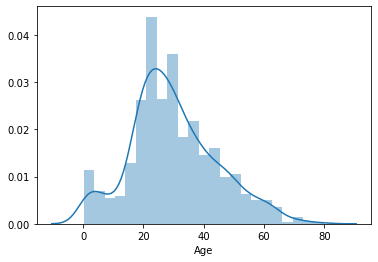

In [11]:
sns.distplot(data['Age'])

In [12]:
data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [13]:
data['initial']=0
for i in data:
    data['initial']=data.Name.str.extract('([A-Za-z]+)\.')
    

In [14]:
data['initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [15]:
data['initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'],[0,1,2,3,0,0,0,2,2,0,1,0,2,0,0,1,1,1],inplace=True)

In [16]:
data.groupby('initial')['Age'].mean().to_frame()

,Age
initial,
0,32.802479
1,37.051724
2,21.834533
3,5.482642


In [17]:
data.loc[(data.Age.isnull())&(data.initial==0),'Age']=33
data.loc[(data.Age.isnull())&(data.initial==1),'Age']=37
data.loc[(data.Age.isnull())&(data.initial==2),'Age']=22
data.loc[(data.Age.isnull())&(data.initial==3),'Age']=5

In [18]:
data['trying']=pd.cut(data['Age'],bins=5)

In [19]:
data.groupby('trying')['Survived'].mean().to_frame()

,Survived
trying,
"(0.0902, 16.136]",0.548077
"(16.136, 32.102]",0.392670
"(32.102, 48.068]",0.320000
"(48.068, 64.034]",0.434783
"(64.034, 80.0]",0.090909


In [20]:
data['Mod_age']=0
data.loc[data['Age']<=16,'Mod_age']=0
data.loc[(data['Age']>16) & (data['Age']<=32),'Mod_age']=1
data.loc[(data['Age']>32) & (data['Age']<=48),'Mod_age']=2
data.loc[(data['Age']>48) & (data['Age']<=64),'Mod_age']=3
data.loc[(data['Age']>64) & (data['Age']<=80),'Mod_age']=4


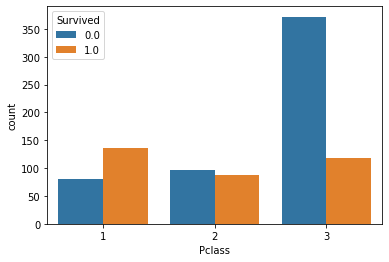

In [21]:
sns.countplot('Pclass',hue='Survived',data=data)

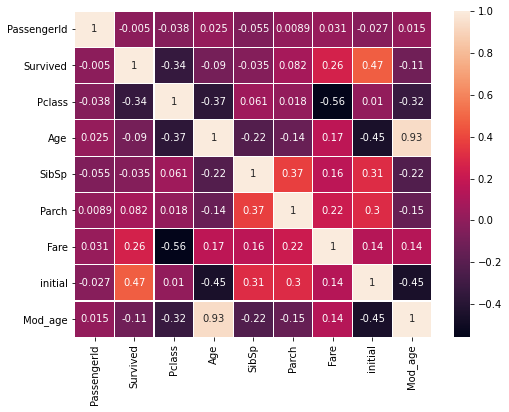

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,linewidths=0.2)

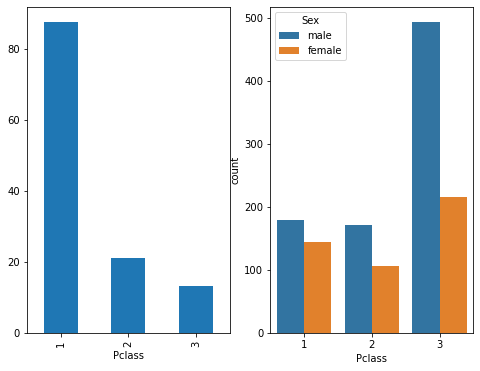

In [23]:
f,ax=plt.subplots(1,2,figsize=(8,6))
data.groupby('Pclass')['Fare'].mean().plot.bar(ax=ax[0])
sns.countplot(x='Pclass',hue='Sex',data=data, ax=ax[1])

In [24]:
pd.crosstab(data.Pclass,data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
data['Fare'].describe(include='all')

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [26]:
data['Fare_Range']=pd.qcut(data['Fare'],4)

In [27]:
data.groupby('Fare_Range')['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [28]:
data['Fare_percent']=0
data.loc[data['Fare']<=8,'Fare_percent']=0
data.loc[(data['Fare']>8) & (data['Fare']<=14),'Fare_percent']=1
data.loc[(data['Fare']>14) & (data['Fare']<=31),'Fare_percent']=2
data.loc[(data['Fare']>31) & (data['Fare']<=513),'Fare_percent']=3

In [29]:
pd.crosstab(data.SibSp,data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [30]:
data['Mod_sibsp']=data['SibSp']+data['Parch']
pd.crosstab(data.Mod_sibsp,data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0,All
Mod_sibsp,,,
0,374,163,537
1,72,89,161
2,43,59,102
3,8,21,29
4,12,3,15
5,19,3,22
6,8,4,12
7,6,0,6
10,7,0,7


In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,trying,Mod_age,Fare_Range,Fare_percent,Mod_sibsp
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,"(16.136, 32.102]",1,"(-0.001, 7.896]",0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"(32.102, 48.068]",2,"(31.275, 512.329]",3,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.136, 32.102]",1,"(7.896, 14.454]",0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(32.102, 48.068]",2,"(31.275, 512.329]",3,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,"(32.102, 48.068]",2,"(7.896, 14.454]",1,0


In [32]:
data.drop(['Name','Age','Fare','Cabin','trying','Fare_Range','Ticket','SibSp'],axis=1,inplace=True)

In [33]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)

In [34]:
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [35]:
data.head()

,PassengerId,Survived,Pclass,Sex,Parch,Embarked,initial,Mod_age,Fare_percent,Mod_sibsp
0,1,0.0,3,0,0,0,0,1,0,1
1,2,1.0,1,1,0,1,1,2,3,1
2,3,1.0,3,1,0,0,2,1,0,0
3,4,1.0,1,1,0,0,1,2,3,1
4,5,0.0,3,0,0,0,0,2,1,0


In [36]:
train1 = data.iloc[:891, :]
test1  = data.iloc[891:, :]
test1.drop(['Survived'],axis=1,inplace=True)

In [37]:
train1.head()

,PassengerId,Survived,Pclass,Sex,Parch,Embarked,initial,Mod_age,Fare_percent,Mod_sibsp
0,1,0.0,3,0,0,0,0,1,0,1
1,2,1.0,1,1,0,1,1,2,3,1
2,3,1.0,3,1,0,0,2,1,0,0
3,4,1.0,1,1,0,0,1,2,3,1
4,5,0.0,3,0,0,0,0,2,1,0


In [38]:
x_data=train1[['Sex','Embarked','initial','Fare_percent','Mod_sibsp','Pclass','Mod_age','Parch']]
y_data=train1['Survived']

In [39]:
from sklearn.preprocessing import StandardScaler 
x_data= StandardScaler().fit(x_data).transform(x_data)


In [40]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x_data,y_data,test_size=0.2,random_state=2)

In [41]:
from sklearn import svm
from sklearn.metrics import accuracy_score as acc, jaccard_similarity_score as jss

In [42]:
model3=svm.SVC(C=0.1,kernel='rbf',gamma=0.1)
model3.fit(xtrain,ytrain)
pred3=model3.predict(xtest)
print(acc(ytest,pred3))
print(jss(ytest,pred3))

0.8044692737430168
0.8044692737430168


In [43]:
from sklearn.model_selection import GridSearchCV
param= {'C': [0.05,0.1,0.2,1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=param,verbose=True)
gd.fit(x_data,y_data)
print(gd.best_score_,gd.best_estimator_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.828278199736363 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.0s finished


In [44]:
model=svm.SVC(C=0.2,kernel='rbf',gamma=0.1)
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(acc(ytest,pred))
print(jss(ytest,pred))

0.8044692737430168
0.8044692737430168


In [45]:
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.05,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb1.fit(xtrain,ytrain)
pred1=xgb1.predict(xtest)

In [46]:
print(acc(ytest,pred1))
print(jss(ytest,pred1))

0.8044692737430168
0.8044692737430168


In [47]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gd1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=140, max_depth=5,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gd1.fit(x_data,y_data)
print(gd1.best_params_, gd1.best_score_)

{'max_depth': 5, 'min_child_weight': 3} 0.8802101602145009


In [48]:
param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gd2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gd2.fit(x_data,y_data)
print(gd2.best_params_, gd2.best_score_)



{'gamma': 0.1} 0.8784037564694082


In [49]:
param_test4 = {'subsample':[i/10.0 for i in range(6,10)],'colsample_bytree':[i/10.0 for i in range(6,10)]}
gd3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=177, max_depth=3,
 min_child_weight=5, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gd3.fit(x_data,y_data)
print(gd3.best_params_, gd3.best_score_)

{'colsample_bytree': 0.9, 'subsample': 0.6} 0.8793639911634233


In [50]:
param_test6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
gd4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=177, max_depth=3,
 min_child_weight=5, gamma=0.1, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gd4.fit(x_data,y_data)
print(gd4.best_params_, gd4.best_score_)

{'reg_alpha': 1e-05} 0.8785085681659979


In [51]:
xgb2 = XGBClassifier(learning_rate =0.01,n_estimators=177,max_depth=3,min_child_weight=5,gamma=0.1,subsample=0.9,colsample_bytree=0.8,reg_alpha=1e-05,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb2.fit(xtrain,ytrain)
pred2=xgb2.predict(xtest)

In [52]:
print(acc(ytest,pred2))
print(jss(ytest,pred2))

0.7988826815642458
0.7988826815642458


In [53]:
test1.head()

,PassengerId,Pclass,Sex,Parch,Embarked,initial,Mod_age,Fare_percent,Mod_sibsp
891,892,3,0,0,2,0,2,0,0
892,893,3,1,0,0,1,2,0,1
893,894,2,0,0,2,0,3,1,0
894,895,3,0,0,0,0,1,1,0
895,896,3,1,1,0,1,1,1,2


In [54]:
req=test1[['Sex','Embarked','initial','Fare_percent','Mod_sibsp','Pclass','Mod_age','Parch']]
req=req.values
predictions=xgb2.predict(req)
output = pd.DataFrame({'PassengerId': test1.PassengerId, 'Survived': predictions})

In [55]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
